# Multiclass Classification Neural Network

In [1]:
# Importing TF and checking the version
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
from tensorflow.keras.datasets import fashion_mnist

# The data is already split into training and testing subsets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
# Show first training sample
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

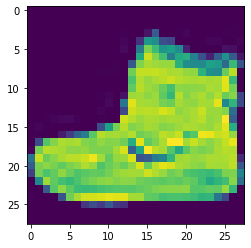

In [4]:
# Plot first training sample
import matplotlib.pyplot as plt

plt.imshow(train_data[0])

In [5]:
# List of actual classes

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"
]
len(class_names)

10

Text(0.5, 1.0, 'Sneaker')

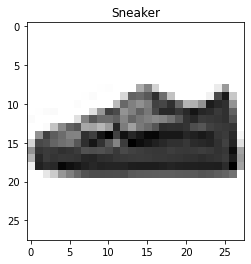

In [6]:
# Plot an example image and its label
index_of_choice = 108
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

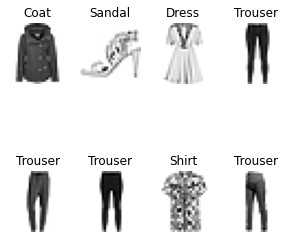

In [7]:
# Random 4 images from the training dataset
import random

plt.figure(figsize=(5, 5))

for i in range(8):
    ax = plt.subplot(2, 4, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Model 1

In [8]:
# Create a model
model_mc1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model - Sparse Categorical Crossentropy
model_mc1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_mc1 = model_mc1.fit(
    train_data,
    train_labels,
    epochs=10,
    validation_data=(test_data, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.3832 - accuracy: 0.1367 - val_loss: 1.8780 - val_accuracy: 0.2044
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.7687 - accuracy: 0.2533 - val_loss: 1.7197 - val_accuracy: 0.2307
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.6868 - accuracy: 0.2728 - val_loss: 1.6884 - val_accuracy: 0.2456
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.6525 - accuracy: 0.2803 - val_loss: 1.6555 - val_accuracy: 0.2840
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.6353 - accuracy: 0.2831 - val_loss: 1.6287 - val_accuracy: 0.2775
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.6267 - accuracy: 0.2861 - val_loss: 1.6585 - val_accuracy: 0.2685
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6246 - accuracy: 0.2907 - val_loss: 1.6135 - val_accu

In [9]:
tf.one_hot(train_labels, depth=10)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [10]:
# Create a model
model_mc1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_mc1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_mc1 = model_mc1.fit(
    train_data,
    tf.one_hot(train_labels, depth=10),
    epochs=10,
    validation_data=(test_data, tf.one_hot(test_labels, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.1661 - accuracy: 0.1926 - val_loss: 2.0123 - val_accuracy: 0.2071
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9358 - accuracy: 0.2387 - val_loss: 1.8978 - val_accuracy: 0.2432
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8072 - accuracy: 0.2729 - val_loss: 1.7214 - val_accuracy: 0.2851
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.7057 - accuracy: 0.2934 - val_loss: 1.6438 - val_accuracy: 0.3199
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5500 - accuracy: 0.3254 - val_loss: 1.4990 - val_accuracy: 0.3437
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.4909 - accuracy: 0.3295 - val_loss: 1.4737 - val_accuracy: 0.3479
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.4656 - accuracy: 0.3329 - val_loss: 1.5018 - val_accuracy:

In [11]:
# Model summary
model_mc1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Checking min/max values
train_data.min(), train_data.max()

(0, 255)

In [13]:
# Normalise the data in the interval 0 to 1
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [14]:
# Checking normalised min/max values
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [15]:
# Create a model
model_mc2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_mc2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_mc2 = model_mc2.fit(
    train_data_norm,
    train_labels,
    epochs=10,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4022 - accuracy: 0.4488 - val_loss: 0.8768 - val_accuracy: 0.6978
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7609 - accuracy: 0.7153 - val_loss: 0.7381 - val_accuracy: 0.7215
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6916 - accuracy: 0.7333 - val_loss: 0.6988 - val_accuracy: 0.7357
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6648 - accuracy: 0.7433 - val_loss: 0.6822 - val_accuracy: 0.7360
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6468 - accuracy: 0.7542 - val_loss: 0.6790 - val_accuracy: 0.7487
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6333 - accuracy: 0.7644 - val_loss: 0.6511 - val_accuracy: 0.7603
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6224 - accuracy: 0.7726 - val_loss: 0.6498 - val_accuracy:

<AxesSubplot:title={'center':'Normalised data'}>

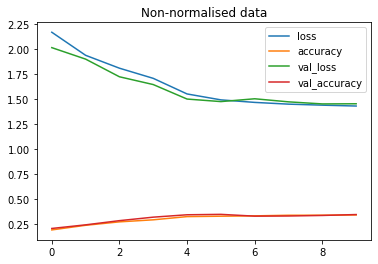

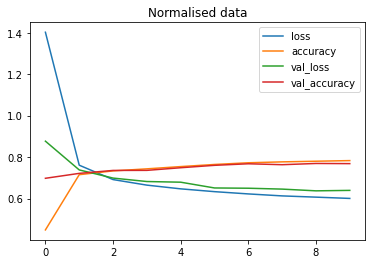

In [16]:
import pandas as pd

# Plot curves
pd.DataFrame(history_mc1.history).plot(title="Non-normalised data")
pd.DataFrame(history_mc2.history).plot(title="Normalised data")

## Finding ideal learning rate

In [17]:
# Create a model
model_mc3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile a model
model_mc3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Create a learning rate call back
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
history_mc3 = model_mc3.fit(
    train_data_norm,
    train_labels,
    epochs=40,
    validation_data=(test_data_norm, test_labels),
    callbacks=[lr_scheduler]
)

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1065 - accuracy: 0.6028 - val_loss: 0.7334 - val_accuracy: 0.7345 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6584 - accuracy: 0.7627 - val_loss: 0.6511 - val_accuracy: 0.7605 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6121 - accuracy: 0.7791 - val_loss: 0.6082 - val_accuracy: 0.7779 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5917 - accuracy: 0.7852 - val_loss: 0.5899 - val_accuracy: 0.7830 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5799 - accuracy: 0.7894 - val_loss: 0.5873 - val_accuracy: 0.7844 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5707 - accuracy: 0.7927 - val_loss: 0.5745 - val_accuracy: 0.7908 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 7s

Text(0.5, 1.0, 'Finding the best learning rate')

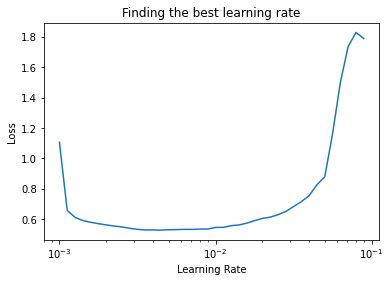

In [18]:
# Plot the learning rate curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, history_mc3.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the best learning rate")

Ideal learning rate seems to be at around 1e-3, i.e. 0.001

In [19]:
# Creating a model with ideal learning rate
model_mc4 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_mc4.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
history_mc4 = model_mc4.fit(
    train_data_norm,
    train_labels,
    epochs=20,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2603 - accuracy: 0.5220 - val_loss: 0.9672 - val_accuracy: 0.6301
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8346 - accuracy: 0.7008 - val_loss: 0.7825 - val_accuracy: 0.7139
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7111 - accuracy: 0.7403 - val_loss: 0.7174 - val_accuracy: 0.7379
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6487 - accuracy: 0.7764 - val_loss: 0.6655 - val_accuracy: 0.7759
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6066 - accuracy: 0.7932 - val_loss: 0.6261 - val_accuracy: 0.7858
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5823 - accuracy: 0.8018 - val_loss: 0.6050 - val_accuracy: 0.7981
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5676 - accuracy: 0.8059 - val_loss: 0.6156 - val_accuracy:

## Confusion Matrix

In [20]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None,
                        figsize=(10, 10), text_size=15):
    # Create a confusion matrix function
    cm = confusion_matrix(y_true, y_pred)
    cm_normalised = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    print("Normalised confusion matrix:\n", cm_normalised)
    n_classes = cm.shape[0]
    print("Confusion matrix' shape:", cm.shape[0])

    # Let's beautify
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to classes
    if classes:
        labels = classes
    else:
        labels = np.arange(n_classes)

    # Label the axes
    ax.set(
        title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels
    )

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colours
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j, i, f"{cm[i, j]} ({cm_normalised[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color = "white" if cm[i, j] > threshold else "black",
            size=text_size
        )

In [21]:
# Make predictions
y_probs = model_mc4.predict(test_data_norm) # Prediction probabilities
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.00983295e-03, 9.11932206e-04, 1.63758779e-03, 1.47141411e-03,
        3.72548704e-04, 2.77364627e-02, 1.03213335e-03, 6.21506989e-01,
        3.70417954e-03, 3.40616941e-01],
       [9.19533893e-04, 5.09084441e-11, 9.75738466e-01, 2.80462160e-07,
        1.18935376e-03, 0.00000000e+00, 2.21520513e-02, 6.96324856e-36,
        3.13384930e-07, 0.00000000e+00],
       [9.58439514e-08, 9.98500943e-01, 4.24438513e-05, 2.64742092e-04,
        1.19108334e-03, 6.19394749e-16, 7.74215209e-07, 8.47640212e-30,
        2.03129202e-12, 1.00526896e-16],
       [6.40113473e-09, 9.99536872e-01, 1.60366170e-07, 3.72432201e-04,
        9.04970948e-05, 2.81380626e-12, 4.09678300e-08, 4.06508389e-36,
        4.94096036e-14, 1.01171984e-16],
       [2.72934645e-01, 2.96379585e-06, 5.38095050e-02, 2.66457237e-02,
        1.13632400e-02, 6.24932901e-17, 6.32772684e-01, 8.68122752e-26,
        2.47123791e-03, 4.76907169e-20]], dtype=float32)

In [22]:
# Convert preds into integers
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([7, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [23]:
# Calculation the confusion matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[717,   0,  14,  70,   2,   2, 178,   1,  16,   0],
       [  1, 941,  13,  33,   7,   1,   2,   0,   2,   0],
       [ 12,   6, 754,   8,  59,   0, 154,   0,   7,   0],
       [ 56,   5,   9, 801,  12,   5,  99,   1,   8,   4],
       [  0,   1, 183,  23, 477,   0, 313,   0,   3,   0],
       [  0,   0,   0,   1,   0, 879,   0,  97,   4,  19],
       [122,   2, 111,  35,  33,   2, 670,   0,  25,   0],
       [  0,   0,   0,   0,   0,  29,   0, 926,   0,  45],
       [  3,   1,   7,   7,   2,  11,  39,   5, 924,   1],
       [  0,   0,   0,   0,   0,  20,   0,  76,   1, 903]], dtype=int64)

Normalised confusion matrix:
 [[0.717 0.    0.014 0.07  0.002 0.002 0.178 0.001 0.016 0.   ]
 [0.001 0.941 0.013 0.033 0.007 0.001 0.002 0.    0.002 0.   ]
 [0.012 0.006 0.754 0.008 0.059 0.    0.154 0.    0.007 0.   ]
 [0.056 0.005 0.009 0.801 0.012 0.005 0.099 0.001 0.008 0.004]
 [0.    0.001 0.183 0.023 0.477 0.    0.313 0.    0.003 0.   ]
 [0.    0.    0.    0.001 0.    0.879 0.    0.097 0.004 0.019]
 [0.122 0.002 0.111 0.035 0.033 0.002 0.67  0.    0.025 0.   ]
 [0.    0.    0.    0.    0.    0.029 0.    0.926 0.    0.045]
 [0.003 0.001 0.007 0.007 0.002 0.011 0.039 0.005 0.924 0.001]
 [0.    0.    0.    0.    0.    0.02  0.    0.076 0.001 0.903]]
Confusion matrix' shape: 10


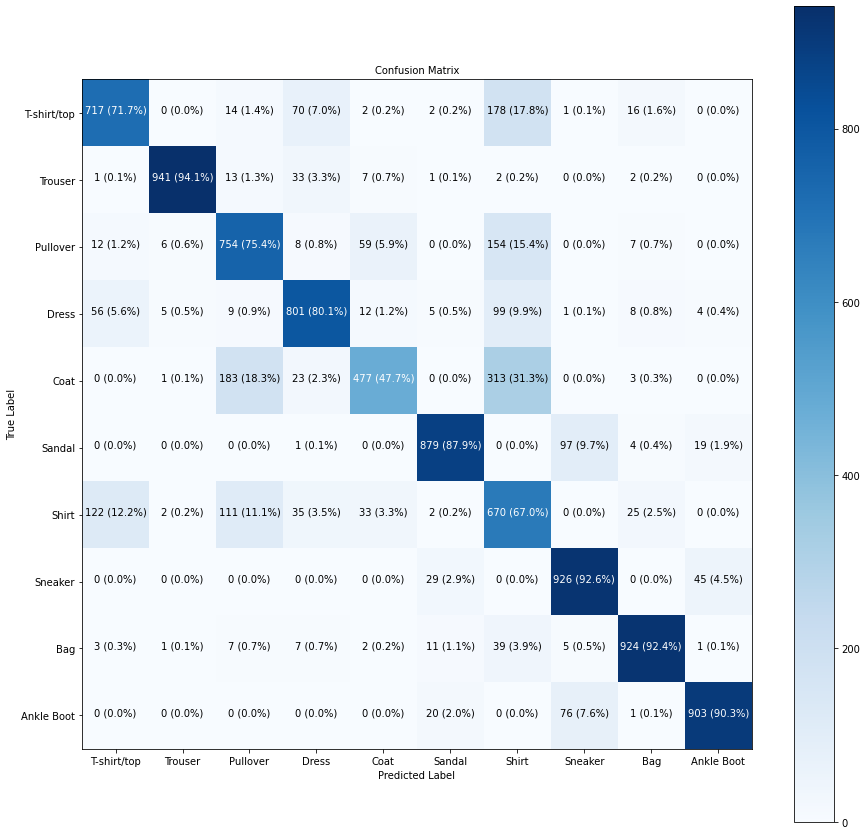

In [24]:
# Beautify with our function
make_confusion_matrix(y_true=test_labels, y_pred=y_preds, classes=class_names, figsize=(15, 15), text_size=10)

## Building a function to select a random image, make prediction and verify it

In [25]:
import random

def plot_random_image(model, images, true_labels, classes):
    """
    This function picks a random image, plots it and labels with its prediction
    """
    
    # Setup a random image
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the colour of the title, depending on whether prediction is right/wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
    
    # Add xlabel information
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(
        pred_label, 100*tf.reduce_max(pred_probs), true_label
    ), color=color)
    

1/1 [==============================] - 0s 43ms/step


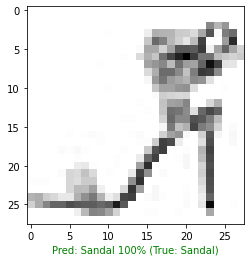

In [26]:
# Check the random image and its prediction
plot_random_image(
    model=model_mc4,
    images=test_data_norm,
    true_labels=test_labels,
    classes=class_names
)

## Patterns in ML models

In [27]:
# Checking layers
model_mc4.layers

In [29]:
# Extracting particular layer
model_mc4.layers[1]

In [30]:
# Get the patterns of layers
weights, biases = model_mc4.layers[1].get_weights()
weights, weights.shape

(array([[ 0.889321  , -0.8356182 ,  0.476219  ,  0.05926196],
        [ 1.1174359 , -0.90169716,  0.8785007 ,  0.4212841 ],
        [ 0.3369021 , -0.9805047 ,  0.33874303,  0.89188904],
        ...,
        [ 0.14161529,  0.20907462,  0.09906855, -0.17707945],
        [-0.4463588 , -0.1061167 ,  0.56550837, -0.27532718],
        [ 0.6222042 , -0.37901497,  0.24173304,  0.33114836]],
       dtype=float32),
 (784, 4))